In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
# import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [4]:
df = pd.read_csv(r'D:\Desktop\Econometrics\Economics2020\Datage.csv')

In [5]:
df.columns

Index(['CBYEAR', 'COUNTRY', 'ID', 'RESPONSE', 'STRATUM', 'INDWT', 'RESPSEX',
       'RESPAGE', 'FEELTRU', 'FEELEMP',
       ...
       'C3_TIME', 'INT_DATE', 'INT_START', 'INT_END', 'INT_DUR', 'INTLANG',
       'NPSUSS', 'NHHPSU', 'NADHH', 'HHWT'],
      dtype='object', length=670)

In [6]:
df.head()

,CBYEAR,COUNTRY,ID,RESPONSE,STRATUM,INDWT,RESPSEX,RESPAGE,FEELTRU,FEELEMP,...,C3_TIME,INT_DATE,INT_START,INT_END,INT_DUR,INTLANG,NPSUSS,NHHPSU,NADHH,HHWT
0,2022,Georgia,12,Response,Rural,7178.874985,Male,27,4,2,...,Legal skip,24-Dec-21,16:42,17:16,0:34,Armenian,457,159,6,1934.96450
1,2022,Georgia,13,Response,Urban,2667.757841,Male,48,3,3,...,Legal skip,27-Dec-21,13:16,13:52,0:36,Georgian,386,626,3,571.97601
2,2022,Georgia,22,Response,Urban,955.279327,Female,74,3,3,...,16:52,28-Dec-21,16:52,17:33,0:41,Georgian,386,505,4,648.71704
3,2022,Georgia,24,Response,Rural,694.598918,Female,52,2,2,...,Legal skip,28-Dec-21,14:36,15:33,0:57,Georgian,506,551,2,519.28571
4,2022,Georgia,26,Response,Rural,528.164574,Male,59,4,2,...,Legal skip,27-Dec-21,15:10,16:00,0:50,Georgian,506,160,2,422.05844


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Columns: 670 entries, CBYEAR to HHWT
dtypes: float64(2), int64(18), object(650)
memory usage: 7.9+ MB


In [8]:
df.describe(include = "all")


,CBYEAR,COUNTRY,ID,RESPONSE,STRATUM,INDWT,RESPSEX,RESPAGE,FEELTRU,FEELEMP,...,C3_TIME,INT_DATE,INT_START,INT_END,INT_DUR,INTLANG,NPSUSS,NHHPSU,NADHH,HHWT
count,1540.0,1540,1540.000000,1540,1540,1540.000000,1540,1540.000000,1540.000000,1540.000000,...,1540,1540,1540,1540,1540,1540,1540.000000,1540.000000,1540.000000,1540.000000
unique,NaN,1,NaN,1,3,NaN,2,NaN,NaN,NaN,...,46,41,496,489,77,3,NaN,NaN,NaN,NaN
top,NaN,Georgia,NaN,Response,Rural,NaN,Female,NaN,NaN,NaN,...,Legal skip,26-Dec-21,16:22,Interviewer error,0:37,Georgian,NaN,NaN,NaN,NaN
freq,NaN,1540,NaN,1540,759,NaN,991,NaN,NaN,NaN,...,1494,189,11,24,82,1454,NaN,NaN,NaN,NaN
mean,2022.0,NaN,3424.607792,NaN,NaN,1875.070130,NaN,53.909091,3.034416,2.624675,...,NaN,NaN,NaN,NaN,NaN,NaN,505.301948,460.033117,2.455195,937.770779
std,0.0,NaN,1974.374368,NaN,NaN,2046.803540,NaN,17.705615,0.681690,0.763470,...,NaN,NaN,NaN,NaN,NaN,NaN,207.353773,155.728061,1.217137,727.664034
min,2022.0,NaN,12.000000,NaN,NaN,158.546123,NaN,18.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,157.000000,91.000000,1.000000,345.124730
25%,2022.0,NaN,1740.250000,NaN,NaN,661.982684,NaN,39.000000,3.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,386.000000,352.000000,2.000000,571.976010
50%,2022.0,NaN,3396.000000,NaN,NaN,1219.309063,NaN,56.000000,3.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,506.000000,496.000000,2.000000,690.342830
75%,2022.0,NaN,5173.250000,NaN,NaN,2270.115399,NaN,68.000000,3.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,715.000000,594.250000,3.000000,1022.257800


In [9]:
y = df['FEELTRU']
x = df[['FEELCLS',
        'FEELRLY',
        'GALLTRU']]
        
x = sm.add_constant(x)
x.head()

c:\Users\Stephen\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,FEELCLS,FEELRLY,GALLTRU
0,1.0,4,4,2
1,1.0,3,3,3
2,1.0,4,3,3
3,1.0,4,4,5
4,1.0,4,4,5


In [10]:
model = sm.OLS(y, x) #Ordinary Least Squares
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                FEELTRU   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     130.4
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           3.02e-75
Time:                        12:33:14   Log-Likelihood:                -1419.9
No. Observations:                1540   AIC:                             2848.
Df Residuals:                    1536   BIC:                             2869.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3150      0.090     14.641      0.000       1.139       1.491
FEELCLS        0.2229      0.026      8.419      0.000       0.171       0.275
FEELRLY        0.2476      0.026      9.459      0.000       0.196       0.299
GALLTRU        0.0366      0.006      5.778      0.000       0.024       0.049
==============================================================================
Omnibus:                       11.108   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.240
Skew:                          -0.199   Prob(JB):                      0.00363
Kurtosis:                       2.873   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [13]:
X_variables = df[['FEELRLY','FEELCLS','GALLTRU']]


In [15]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]
vif_data

,feature,VIF
0,FEELRLY,25.207324
1,FEELCLS,24.755218
2,GALLTRU,4.562970


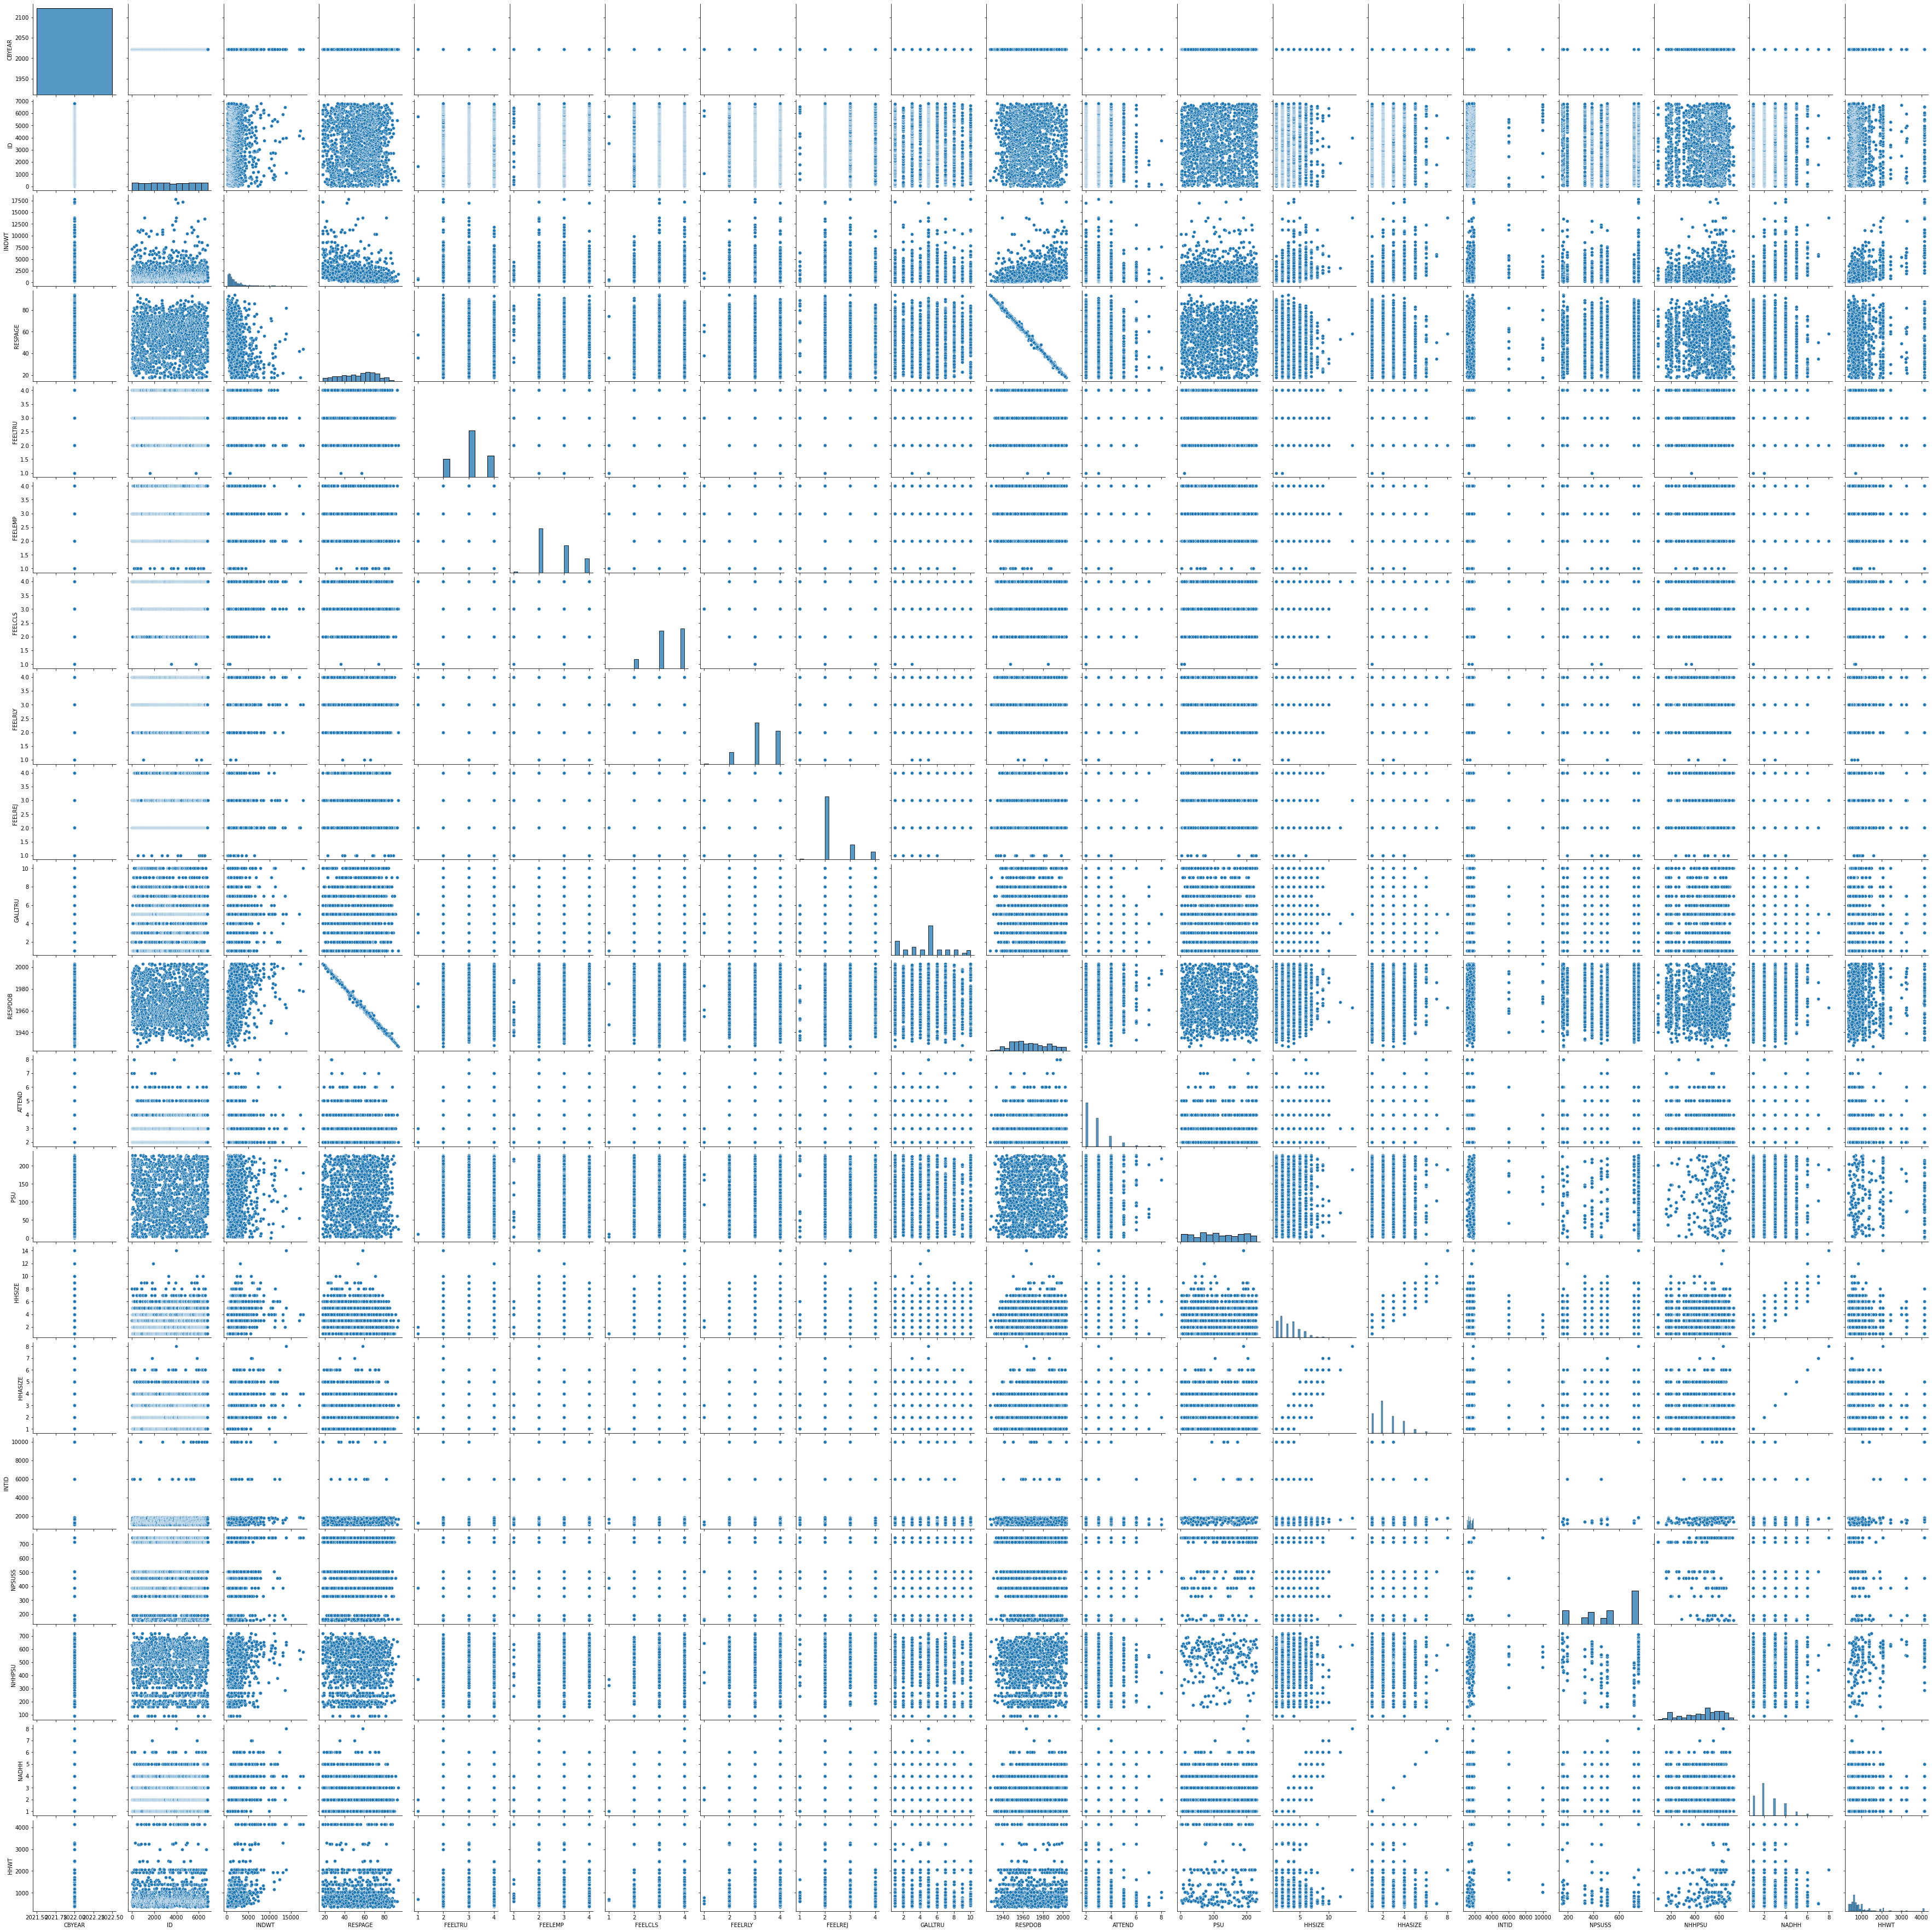

In [18]:
sns.pairplot(df)